Nr. Records = 5844
First timestamp: 2006-01-01 00:00:00
Last timestamp: 2021-12-31 00:00:00


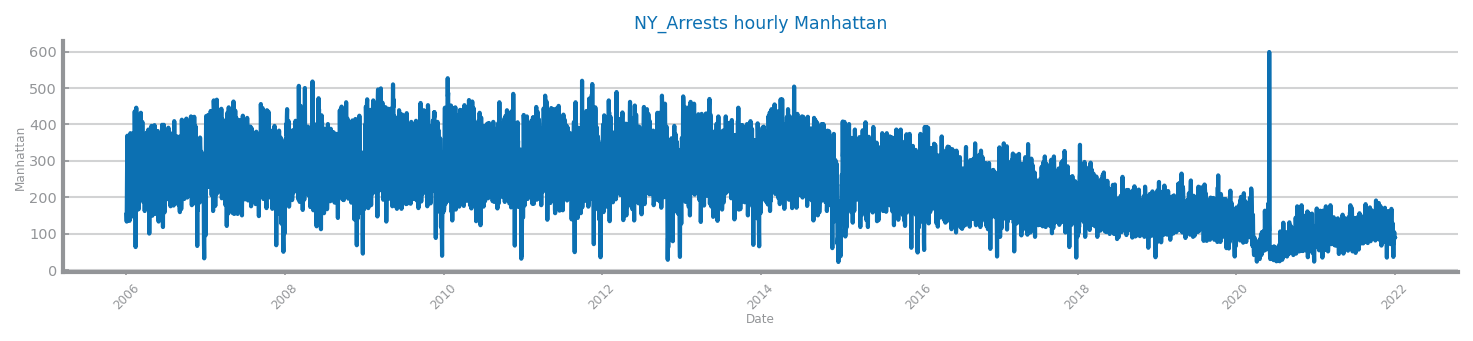

In [19]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

# File details
file_tag = "NY_Arrests"
target = "Manhattan"

# Load data
data: DataFrame = read_csv(
    "/Users/pascalludwig/Documents/Master/Semester 1/Term 2/Data Science/Project/DataScience/Projeto/TimeSeries/forecast_ny_arrests.csv",
    index_col="Date",
    sep=";",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)

# Extract target series
series: Series = data[target]

# Profiling output
print("Nr. Records =", series.shape[0])
print("First timestamp:", series.index[0])
print("Last timestamp:", series.index[-1])

# Plot univariate time series
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} hourly {target}",
)
show()


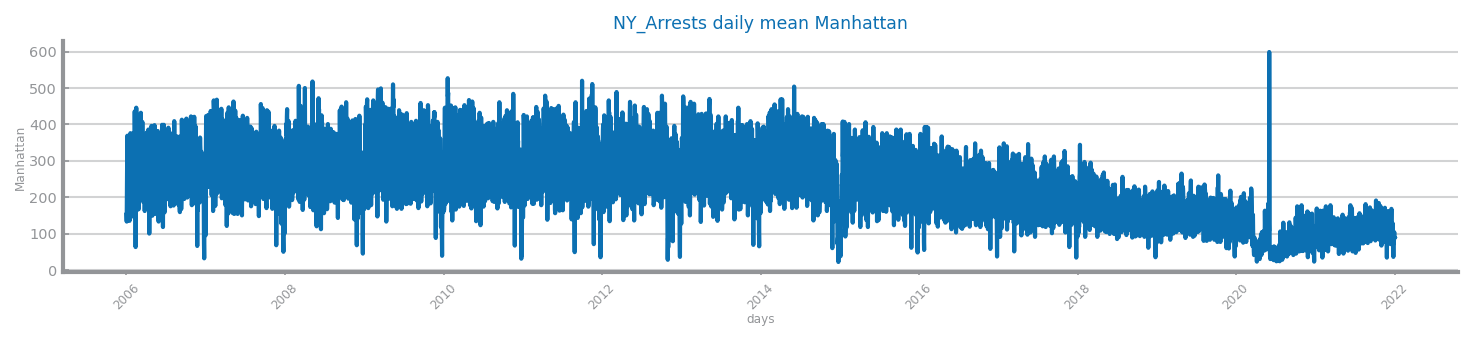

In [20]:
from pandas import Series, DataFrame, Index, Period
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

# Define the aggregation function
def ts_aggregation_by(
    data: Series | DataFrame,
    gran_level: str = "D",
    agg_func: str = "mean",
) -> Series | DataFrame:
    df: Series | DataFrame = data.copy()
    index: Index[Period] = df.index.to_period(gran_level)
    df = df.groupby(by=index, dropna=True, sort=True).agg(agg_func)
    df.index.drop_duplicates()
    df.index = df.index.to_timestamp()

    return df

# Perform daily aggregation on the 'Manhattan' series
ss_days: Series = ts_aggregation_by(series, "D")

# Plot the daily aggregated time series
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_days.index.to_list(),
    ss_days.to_list(),
    xlabel="days",
    ylabel=target,
    title=f"{file_tag} daily mean {target}",
)
show()


In [ ]:
from matplotlib.pyplot import subplots, show
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from pandas import Series

# Define granularity levels to study
grans: list[str] = ["D", "W", "M"]  # Daily, Weekly, Monthly

# Create subplots for each granularity level
fig: Figure
axs: list[Axes]
fig, axs = subplots(len(grans), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(grans)))
fig.suptitle(f"{file_tag} {target} aggregation study")

# Loop through each granularity level
for i in range(len(grans)):
    # Aggregate the time series to the current granularity level
    ss: Series = ts_aggregation_by(series, grans[i])

    # Plot the aggregated time series on the respective subplot
    plot_line_chart(
        ss.index.to_list(),
        ss.to_list(),
        ax=axs[i],
        xlabel=f"{ss.index.name} ({grans[i]})",  # Label with granularity level
        ylabel=target,
        title=f"granularity={grans[i]}",  # Title for the subplot
    )

# Display the plots
show()
